In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Load CSV file
df = pd.read_csv("Delinquency_prediction_dataset.csv")  # Replace with your actual path

In [2]:
# Step 2: Basic Info
print("🔍 Dataset Shape:", df.shape)
print("\n📊 Column Types:\n", df.dtypes)
print("\n❓ Missing Values:\n", df.isnull().sum())

🔍 Dataset Shape: (500, 19)

📊 Column Types:
 Customer_ID              object
Age                       int64
Income                  float64
Credit_Score            float64
Credit_Utilization      float64
Missed_Payments           int64
Delinquent_Account        int64
Loan_Balance            float64
Debt_to_Income_Ratio    float64
Employment_Status        object
Account_Tenure            int64
Credit_Card_Type         object
Location                 object
Month_1                  object
Month_2                  object
Month_3                  object
Month_4                  object
Month_5                  object
Month_6                  object
dtype: object

❓ Missing Values:
 Customer_ID              0
Age                      0
Income                  39
Credit_Score             2
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance            29
Debt_to_Income_Ratio     0
Employment_Status        0
Account_Tenure           0
Credit_Card_Type

In [3]:
# Step 3: Impute missing numerical values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('Delinquent_Account', errors='ignore')  # exclude target
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [4]:
# Step 4: Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [5]:
# Step 5: Summary statistics
print("\n📈 Summary Statistics:\n", df.describe())


📈 Summary Statistics:
        Customer_ID         Age         Income  Credit_Score  \
count   500.000000  500.000000     500.000000    500.000000   
mean    249.500000   46.266000  108323.586000    577.750000   
std     144.481833   16.187629   51523.389667    168.543244   
min       0.000000   18.000000   15404.000000    301.000000   
25%     124.750000   33.000000   67610.500000    418.750000   
50%     249.500000   46.500000  107658.000000    586.000000   
75%     374.250000   59.250000  152572.250000    725.750000   
max     499.000000   74.000000  199943.000000    847.000000   

       Credit_Utilization  Missed_Payments  Delinquent_Account  Loan_Balance  \
count          500.000000       500.000000          500.000000    500.000000   
mean             0.491446         2.968000            0.160000  48487.480000   
std              0.197103         1.946935            0.366973  28536.522206   
min              0.050000         0.000000            0.000000    612.000000   
25%     

In [6]:
# Step 6: Define features and target
X = df.drop(columns=['Delinquent_Account'])  # Features
y = df['Delinquent_Account']  # Target

In [7]:
# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\n✅ Data split complete:\nTrain shape: {X_train.shape} | Test shape: {X_test.shape}")


✅ Data split complete:
Train shape: (400, 18) | Test shape: (100, 18)


In [8]:
# Step 8: Train Random Forest with class balancing
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [9]:
# Step 9: Predict
y_pred = model.predict(X_test)

In [10]:
# Step 10: Evaluate model
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


📊 Confusion Matrix:
[[86  0]
 [14  0]]

📈 Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           1       0.00      0.00      0.00        14

    accuracy                           0.86       100
   macro avg       0.43      0.50      0.46       100
weighted avg       0.74      0.86      0.80       100



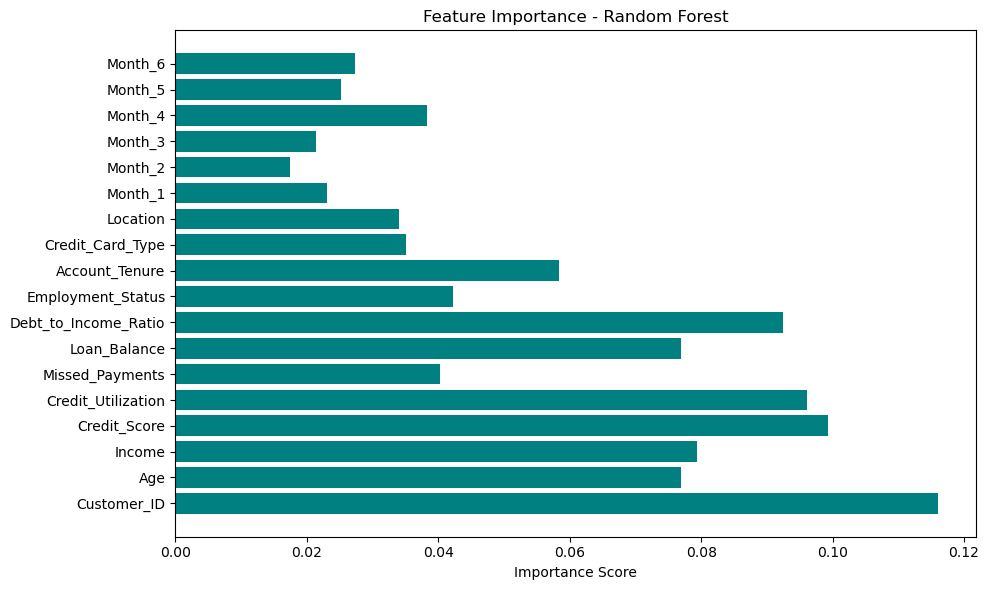

In [11]:
# Step 11: Feature Importance Plot
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='teal')
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()